In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Load the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Preview the dataset
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


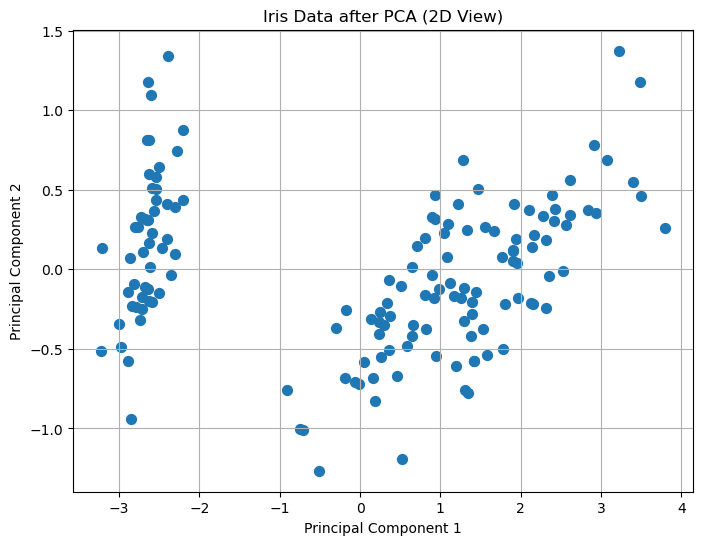

In [24]:
# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot of the PCA-transformed data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50)
plt.title("Iris Data after PCA (2D View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [25]:
#Fit K-Means and Assign Cluster Labels

# Apply KMeans clustering (assume K=3 initially)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original dataset
X['Cluster'] = kmeans.labels_

# View data with cluster column
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


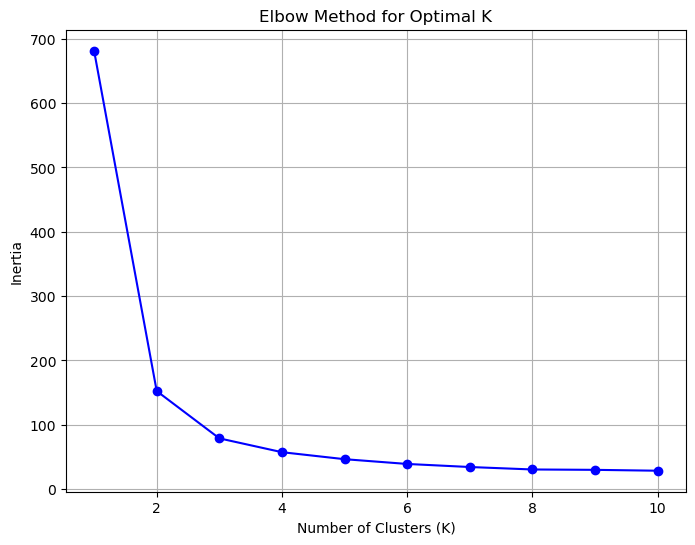

In [29]:
#Use Elbow Method to Find Optimal K

# Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X.iloc[:, :-1])  # Exclude the cluster column
    inertia.append(model.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

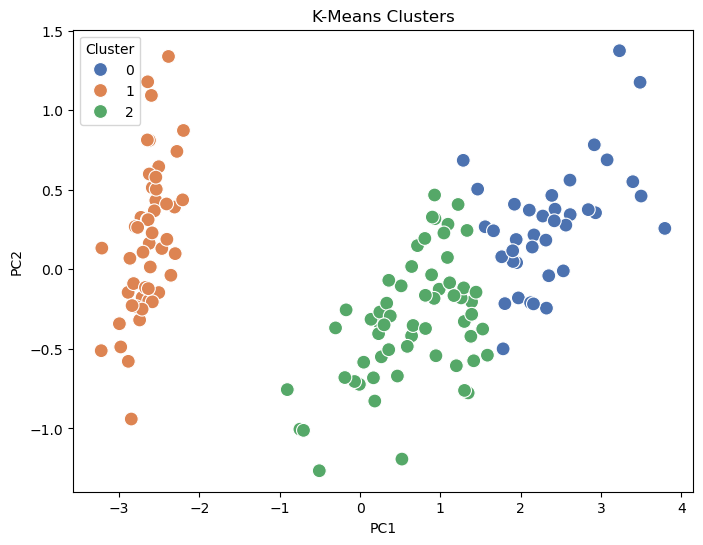

In [31]:
# Visualize Clusters with Color-Coding

# Recompute PCA
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Cluster'] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='Cluster', palette='deep', s=100)
plt.title('K-Means Clusters')
plt.show()

In [32]:
#Evaluate Clustering using Silhouette Score

# Calculate silhouette score
score = silhouette_score(X.iloc[:, :-1], kmeans.labels_)
print(f"Silhouette Score for K=3: {score:.4f}")


Silhouette Score for K=3: 0.5512
